In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [59]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.526749  1.055984  1.610989  2.141668   
1      hashing_cerrado_lineal  0.397016  0.806923  1.231844  1.639972   
2  hashing_cerrado_cuadratico  0.382430  0.788086  1.198889  1.610846   
3       hashing_cerrado_doble  0.403748  0.795571  1.230326  1.660606   
4          std::unordered_map  0.417871  0.810580  1.275217  1.630673   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.685961  3.171341  3.708822  4.221517  4.832012  ...  5.877813  6.467155   
1  2.060495  2.446720  2.855799  3.209615  3.686217  ...  4.392306  4.843082   
2  2.028101  2.436933  2.862806  3.201205  3.653555  ...  4.391702  4.817993   
3  2.081003  2.498486  2.924769  3.286863  3.759108  ...  4.510527  4.923593   
4  2.028902  2.580686  2.970049  3.288771  3.756117  ...  4.926143  5.322769   

      13000     14000     15000     16000     17000     18000      19000  \
0  7

In [60]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.526749    0.054449
1      hashing_cerrado_lineal        1000  0.397016    0.041634
2  hashing_cerrado_cuadratico        1000  0.382430    0.038550
3       hashing_cerrado_doble        1000  0.403748    0.076632
4          std::unordered_map        1000  0.417871    0.040189
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.764982    0.041400
1      hashing_cerrado_lineal        1000  0.641697    0.059216
2  hashing_cerrado_cuadratico        1000  0.627668    0.050787
3       hashing_cerrado_doble        1000  0.810391    0.058419
4          std::unordered_map        1000  0.401442    0.022346


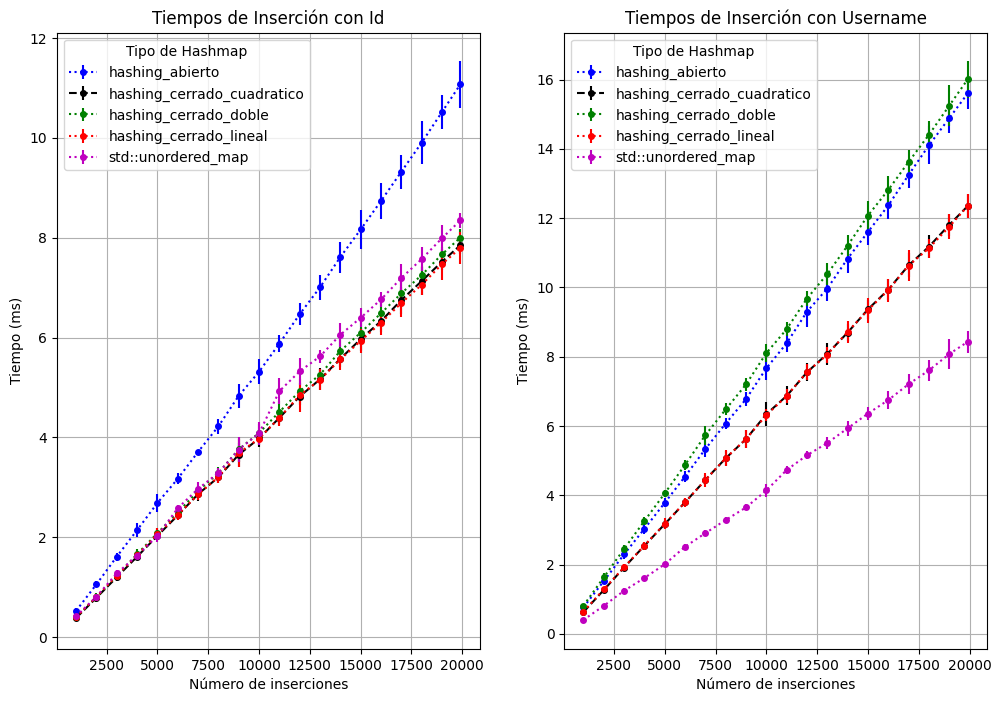

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [62]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.180542  0.369123  0.558914  0.779223   
1      hashing_cerrado_lineal  0.054687  0.108897  0.165132  0.218935   
2  hashing_cerrado_cuadratico  0.054958  0.110700  0.161047  0.218981   
3       hashing_cerrado_doble  0.065608  0.133047  0.197390  0.270097   
4          std::unordered_map  0.153378  0.305924  0.459284  0.622015   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.955480  1.165693  1.469057  1.635992  1.948907  ...  2.520516  2.713087   
1  0.272285  0.321396  0.386000  0.431458  0.493131  ...  0.603337  0.656144   
2  0.271508  0.317966  0.382829  0.421415  0.494689  ...  0.605617  0.652563   
3  0.325520  0.382608  0.457795  0.510777  0.593180  ...  0.721410  0.777997   
4  0.755613  0.901913  1.156864  1.264704  1.500217  ...  1.952418  2.094020   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [63]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.180542    0.016112
1      hashing_cerrado_lineal      1000  0.054687    0.005548
2  hashing_cerrado_cuadratico      1000  0.054958    0.006430
3       hashing_cerrado_doble      1000  0.065608    0.006983
4          std::unordered_map      1000  0.153378    0.016052
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.389494    0.020531
1      hashing_cerrado_lineal      1000  0.245433    0.019525
2  hashing_cerrado_cuadratico      1000  0.242645    0.014462
3       hashing_cerrado_doble      1000  0.424884    0.019729
4          std::unordered_map      1000  0.177947    0.020688


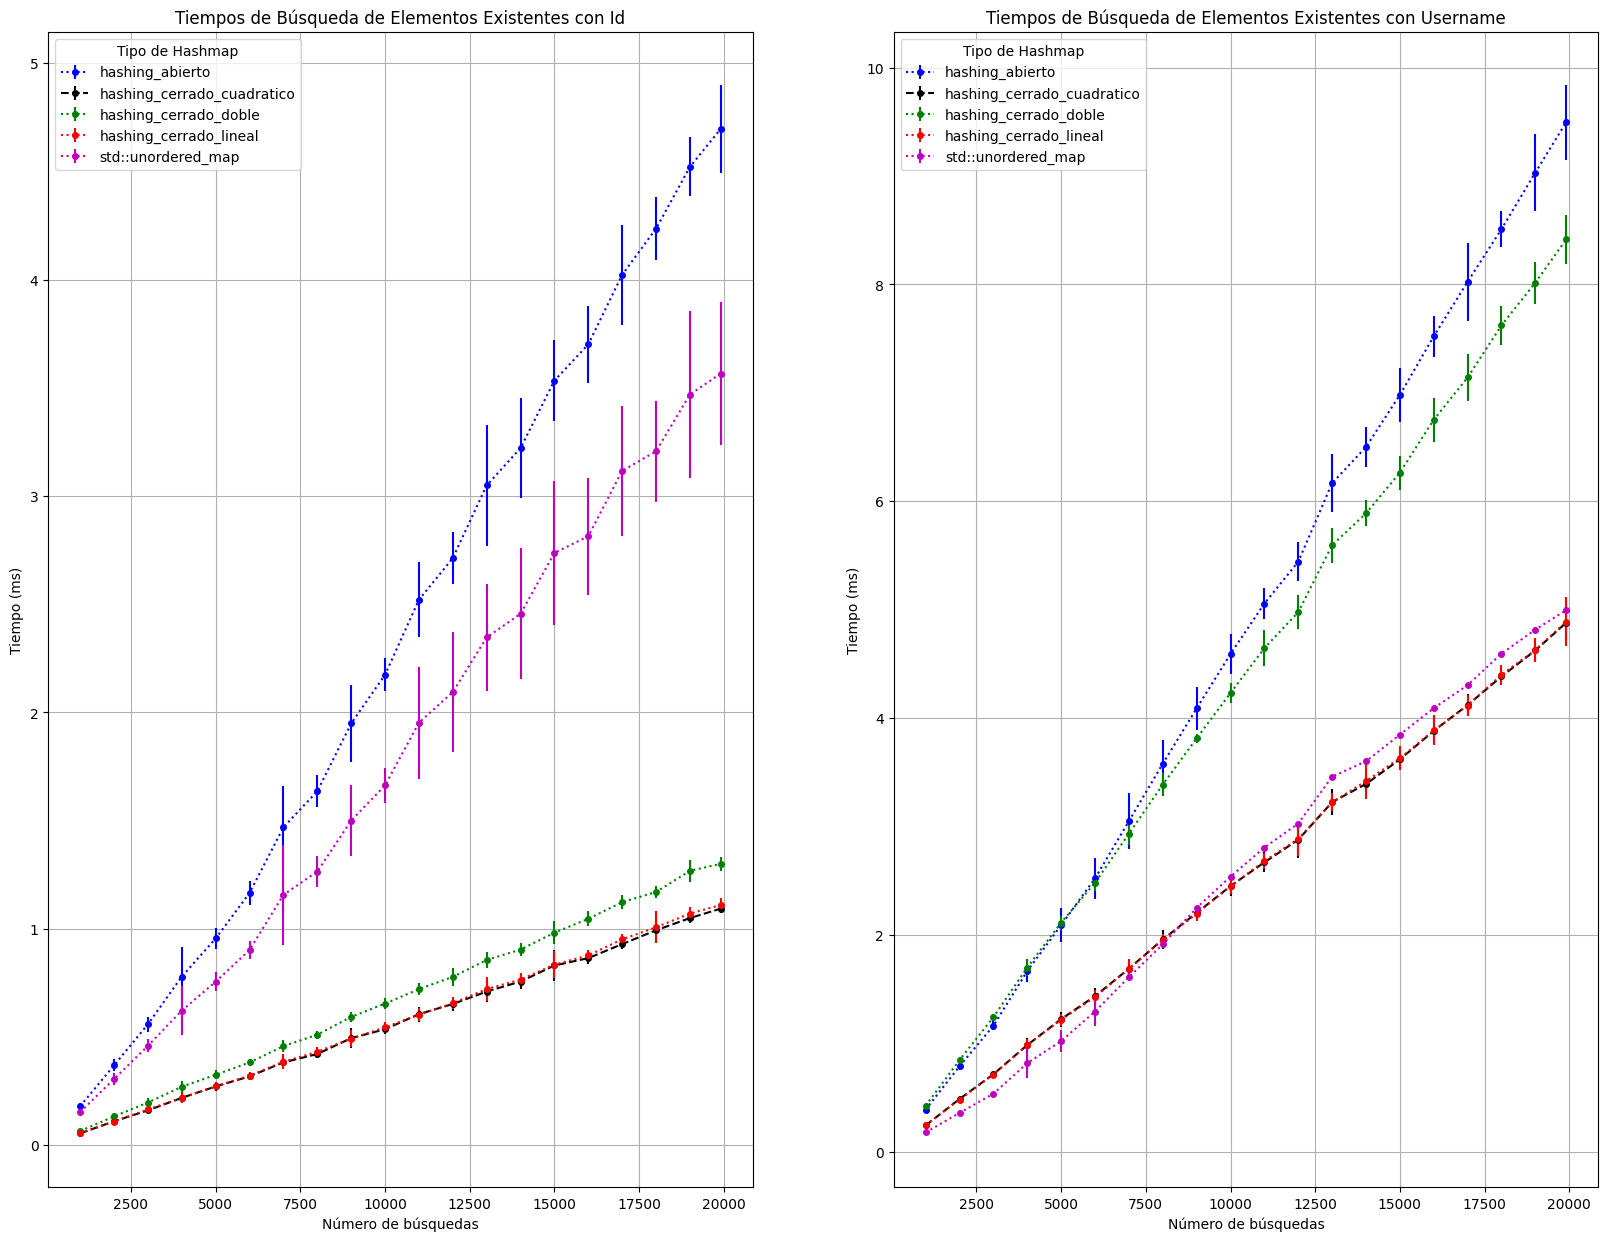

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [65]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.093323  0.170211  0.251689  0.331199   
1      hashing_cerrado_lineal  0.061182  0.112955  0.167874  0.224452   
2  hashing_cerrado_cuadratico  0.060370  0.112732  0.165508  0.222228   
3       hashing_cerrado_doble  0.071428  0.135382  0.199636  0.268709   
4          std::unordered_map  0.149422  0.289092  0.423962  0.549269   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.430307  0.497302  0.570631  0.654611  0.766339  ...  0.939034  0.988732   
1  0.282344  0.330915  0.380821  0.434673  0.504588  ...  0.604661  0.640577   
2  0.286600  0.327501  0.377576  0.428805  0.495364  ...  0.607963  0.640767   
3  0.340327  0.395834  0.452881  0.517563  0.591078  ...  0.719417  0.765055   
4  0.725568  0.818132  0.939870  1.085803  1.261249  ...  1.543591  1.604579   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [66]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.093323    0.033937
1      hashing_cerrado_lineal      1000  0.061182    0.016515
2  hashing_cerrado_cuadratico      1000  0.060370    0.016530
3       hashing_cerrado_doble      1000  0.071428    0.015502
4          std::unordered_map      1000  0.149422    0.049168
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.289813    0.049580
1      hashing_cerrado_lineal      1000  0.253184    0.039791
2  hashing_cerrado_cuadratico      1000  0.251284    0.040588
3       hashing_cerrado_doble      1000  0.432976    0.044849
4          std::unordered_map      1000  0.154535    0.072198


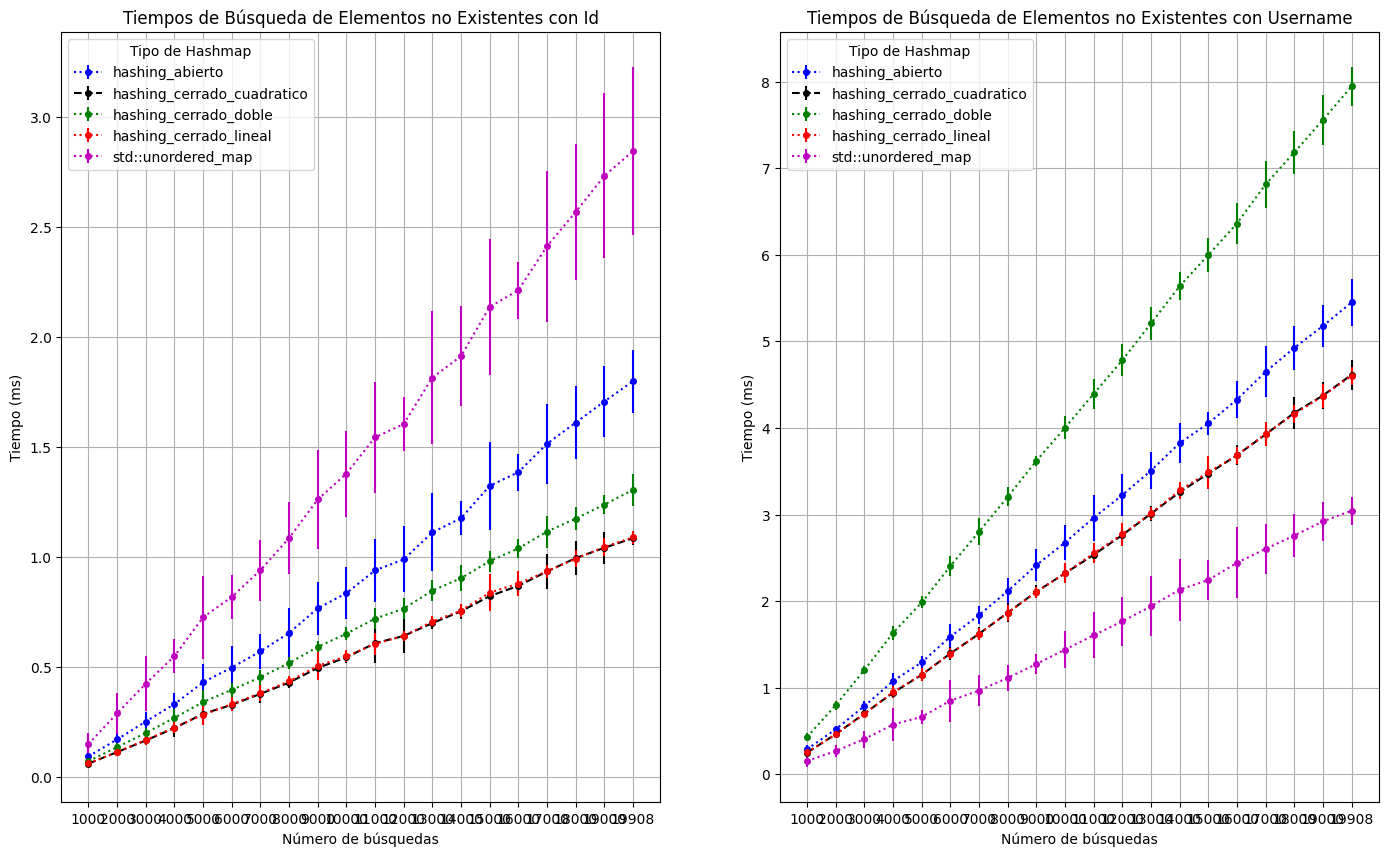

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()